In [ ]:
import pandas as pd
import numpy as np
import openpyxl
import os
from pprint import pprint
import matplotlib.pyplot as plt

In [ ]:
# get all the files with results from the directory
files = os.listdir("../Lab Results")
glucose_readings = []
# define where in the spreadsheet the results lie
meter_ranges = {"AC-Aviva":["B","E"], "Accu-check Performa":["H","K"], "eBwell": ["N", "Q"], "TrueMetrix": ["T","W"]}
# state the row in which the results for each sample lie
sample_rows = {"A":8,"B":9,"C":10, "D":11, "A*":13,"B*":14,"C*":15,"D*":16, "F*":18, "G*":19}
# state the reference concentrations for each sample, this may need changing based on lab
refs = {"A": 3.9, "B":5.0, "C":6.1, "D":7.2, "F*":29.2, "G*":5.0, "A*": 3.9, "B*":5.0, "C*":6.1, "D*":7.2}
# looping badness but I am not crunching a lot of data
# as stated, code below is not that nice but does a good job of organising all the data in a single place
for file in files:
    workbook = openpyxl.load_workbook(f"../Lab Results/{file}")
    readings = workbook["Group 1 Readings"]
    for meter, cols in meter_ranges.items():
        for sample, row in sample_rows.items():
            range = f"{cols[0]}{row}:{cols[1]}{row}"
            results = [result.value for result in readings[range][0] if result.value] 
            if results:
                for result in results:
                    glucose_readings.append({"Sample":sample,"Meter":meter,"Reference": refs[sample], "Glucose Reading": result, "Haematocrit": sample.endswith("*")})

/opt/homebrew/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
# now we can make a nice data frame with data
readings_df = pd.DataFrame(glucose_readings)
# clean up data types by taking the subset of only float values
clean_readings_df = readings_df[readings_df["Glucose Reading"].apply(lambda x: type(x)==float)]
# dump results to excel
clean_readings_df.to_excel("collated_results.xlsx")
# sense check that we have the correct number of results
readings_df.groupby("Meter").count()

,Sample,Reference,Glucose Reading,Haematocrit
Meter,,,,
AC-Aviva,28,28,28,28
Accu-check Performa,59,59,59,59
TrueMetrix,91,91,91,91
eBwell,90,90,90,90


In [ ]:
meter_dfs = []
# output the results for each meter into the format that graph generating website can read
for meter in meter_ranges.keys():
    meter_results = (clean_readings_df[clean_readings_df["Meter"]==meter]*18)
    meter_results[["Glucose Reading", "Reference"]].astype(int).to_csv(f"../meter_csvs/{meter}.csv", index=False, header=["BGM","REF"])


In [ ]:
# find the error of the result
clean_readings_df["Error"] = clean_readings_df["Glucose Reading"] - clean_readings_df["Reference"]
clean_readings_df["Error"] = pd.to_numeric(np.abs(clean_readings_df["Error"]))

/var/folders/mm/gnbdjwnd69l7pysl0_92wpfc0000gn/T/ipykernel_21268/3926547570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_readings_df["Error"] = clean_readings_df["Glucose Reading"] - clean_readings_df["Reference"]
/var/folders/mm/gnbdjwnd69l7pysl0_92wpfc0000gn/T/ipykernel_21268/3926547570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_readings_df["Error"] = pd.to_numeric(np.abs(clean_readings_df["Error"]))


In [ ]:
clean_readings_df[clean_readings_df["Sample"] == "G*"].groupby("Meter").mean()["Glucose Reading"] - clean_readings_df[clean_readings_df["Sample"] == "B*"].groupby("Meter").mean()["Glucose Reading"]

/var/folders/mm/gnbdjwnd69l7pysl0_92wpfc0000gn/T/ipykernel_21268/1077757828.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clean_readings_df[clean_readings_df["Sample"] == "G*"].groupby("Meter").mean()["Glucose Reading"] - clean_readings_df[clean_readings_df["Sample"] == "B*"].groupby("Meter").mean()["Glucose Reading"]


KeyError: 'Glucose Reading'

In [ ]:
readings_df[readings_df["Haematocrit"] == False].to_csv("temp.csv")

Text(0, 0.5, '$\\frac{I_{enz}}{nFk_2[E_{enz}]}$')

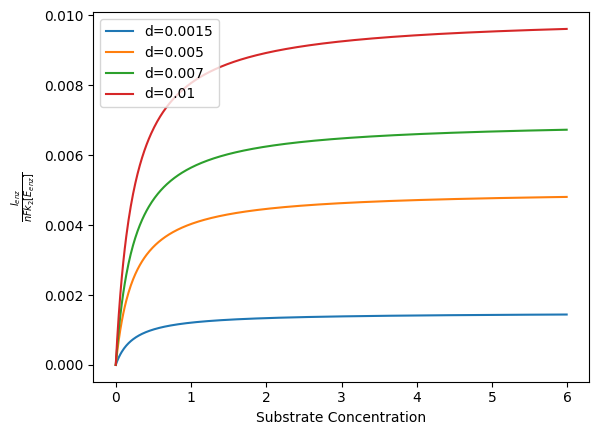

In [ ]:
# honestly no clue what this is but it may be useful?
S = np.arange(0,6,0.01)
Km = 0.24
y = S/(Km+S)
for i in [0.0015,0.0050,0.0070, 0.01]:
    plt.plot(S,y*i, label = f"d={i}")
plt.legend()
plt.xlabel("Substrate Concentration")
plt.ylabel("$\\frac{I_{enz}}{nFk_2[E_{enz}]}$")
